In [1]:
import geopandas as gpd
from tqdm import tqdm
from shapely.validation import explain_validity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import calendar
from itertools import cycle

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
os.chdir("../../scripts")
from clustering_operations import *
from HierarchicalClusteringOptimized import HierarchicalClustering

%load_ext autoreload
%autoreload 2

In [13]:
file = "../data/shapefiles/FAPAN_level_06/FAPAN_level_06_corrected.shp"    

# open file
shp = gpd.read_file(file)
df = pd.read_csv("../data/FAPAN_level_06_corrected.csv")

In [14]:
df.head()

,HYBAS_ID,SUBIDs,Common_Areas,1,2,3,4,5,6,7,...,195,196,197,198,199,200,201,202,203,204
0,2060000020,9000344,0.02401311828330892,-1.447500,-0.678500,-1.512667,-1.678333,-1.416167,-1.088333,-1.370667,...,1.250167,0.948167,0.757500,1.425500,1.163833,0.907167,0.702500,0.387333,1.142833,1.303167
1,2060000250,9750169,0.047660205477118515,-0.841611,-0.376611,-0.481278,-0.624333,0.071333,-0.095611,-0.331389,...,0.336889,-0.485333,-0.822944,0.466722,0.475667,0.332000,0.930167,0.325778,0.846389,1.177056
2,2060000350,9749759_9749894_9750078_9749690_9749915,0.0159530869842181_0.02942515868956173_0.02613...,-0.189248,0.308236,0.170155,-0.148409,0.615358,0.809728,0.691766,...,1.022802,-0.561480,-1.012867,0.068079,-0.087174,0.064454,0.279940,0.107797,0.377528,1.257511
3,2060000360,9000487_9000484_9750185_9755677_9755810_975533...,0.04650632263860207_0.025804922053794144_0.025...,-0.057772,0.641776,-0.071709,-0.831357,0.760276,0.786154,0.367869,...,0.965195,0.859919,0.547498,0.854268,0.965067,0.668454,1.124251,0.211099,0.402814,0.723495
4,2060001220,9001546_9754147_9754198_9754370_9754381_975472...,0.015832480625249445_0.028670940060692374_0.02...,-0.375709,0.292616,-0.427568,-0.681236,0.346457,0.289082,0.170823,...,0.556770,0.158352,-0.532563,-0.285884,-0.040005,-0.136510,-0.218571,-0.832312,-0.120064,1.079247


In [15]:
shp['validity'] = shp.apply(lambda row: explain_validity(row.geometry), axis=1)
shp[shp['validity'] != 'Valid Geometry'].shape

(137, 17)

In [16]:
df = df.drop(["SUBIDs", "Common_Areas"], axis=1)
df = df.rename(columns={"HYBAS_ID" : "SUBID"})
df['SUBID'] = df['SUBID'].astype(str)
shp = shp.rename(columns={"HYBAS_ID" : "SUBID"})
shp['SUBID'] = shp['SUBID'].astype(str)
df

,SUBID,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,2060000020,-1.447500,-0.678500,-1.512667,-1.678333,-1.416167,-1.088333,-1.370667,-1.624833,-1.573833,...,1.250167,0.948167,0.757500,1.425500,1.163833,0.907167,0.702500,0.387333,1.142833,1.303167
1,2060000250,-0.841611,-0.376611,-0.481278,-0.624333,0.071333,-0.095611,-0.331389,-0.702444,-1.164933,...,0.336889,-0.485333,-0.822944,0.466722,0.475667,0.332000,0.930167,0.325778,0.846389,1.177056
2,2060000350,-0.189248,0.308236,0.170155,-0.148409,0.615358,0.809728,0.691766,0.081720,-0.031275,...,1.022802,-0.561480,-1.012867,0.068079,-0.087174,0.064454,0.279940,0.107797,0.377528,1.257511
3,2060000360,-0.057772,0.641776,-0.071709,-0.831357,0.760276,0.786154,0.367869,-0.014714,0.034511,...,0.965195,0.859919,0.547498,0.854268,0.965067,0.668454,1.124251,0.211099,0.402814,0.723495
4,2060001220,-0.375709,0.292616,-0.427568,-0.681236,0.346457,0.289082,0.170823,-0.041098,-0.008199,...,0.556770,0.158352,-0.532563,-0.285884,-0.040005,-0.136510,-0.218571,-0.832312,-0.120064,1.079247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2060092010,-1.494963,-0.647243,0.193877,-0.788099,-0.975851,-1.251790,-0.297143,0.060851,0.464551,...,1.374192,2.169666,2.062164,1.431662,1.352064,1.547649,1.563188,0.975919,0.420016,0.046283
1073,2060092270,NaN,-0.459109,-0.736569,-1.137990,-0.178961,0.250913,0.645547,0.288763,0.359027,...,1.568679,2.396409,1.491833,0.631794,0.466646,0.375075,0.289059,-0.174989,-0.153655,-0.178568
1074,2060094250,NaN,0.206236,-0.640110,-0.469669,0.539658,-0.083044,-0.464367,-0.692698,-0.478246,...,1.885943,1.929488,1.025035,1.230408,2.028067,2.564252,2.209679,1.950304,0.995412,1.113984
1075,2060099470,-1.515500,-0.422330,0.249213,-1.258625,-0.969987,-1.085834,-0.383673,0.261188,0.588339,...,1.044983,2.067039,2.216021,1.660493,1.222940,1.099630,1.180125,0.862366,0.666127,0.374917


<AxesSubplot:>

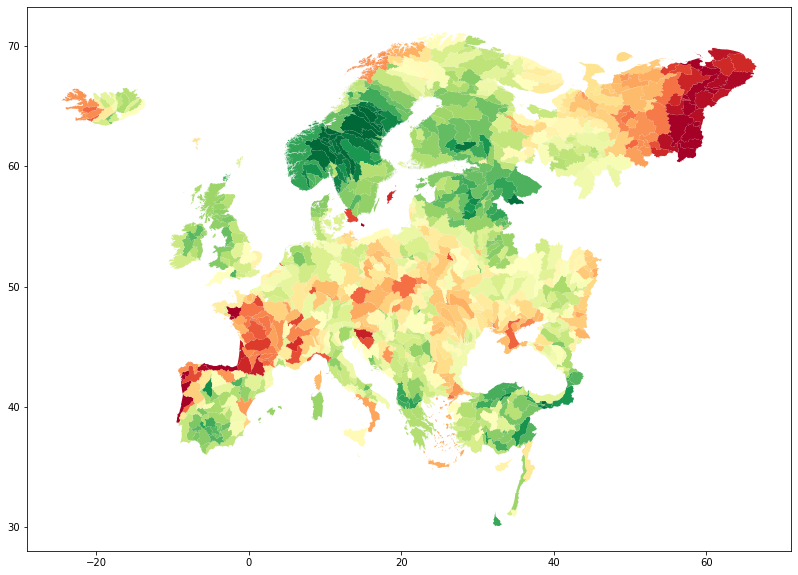

In [17]:
shp.plot(figsize=(16,10), column=df['198'], cmap='RdYlGn', vmin=-2, vmax=2)

In [18]:
def select_columns_by_months(dataframe, selected_months):
    selected_columns = []

    for i in range((dataframe.shape[1] - 1) // 12):
        selected_columns.extend([month + i * 12 for month in selected_months])

    all_columns = np.arange(1, dataframe.shape[1])
    columns_to_drop = np.setdiff1d(all_columns, np.array(selected_columns))
    columns_to_drop = [str(i) for i in columns_to_drop]

    filtered_dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    return filtered_dataframe

In [19]:
df = select_columns_by_months(df, [4,5,6,7,8,9])
df.shape

(1077, 103)

In [20]:
df.head()

,SUBID,4,5,6,7,8,9,16,17,18,...,186,187,188,189,196,197,198,199,200,201
0,2060000020,-1.678333,-1.416167,-1.088333,-1.370667,-1.624833,-1.573833,-1.185667,-1.158500,-1.497667,...,1.598667,1.292667,0.903500,0.432333,0.948167,0.757500,1.425500,1.163833,0.907167,0.702500
1,2060000250,-0.624333,0.071333,-0.095611,-0.331389,-0.702444,-1.164933,1.400056,0.359389,-0.206611,...,1.366889,1.099611,0.954111,1.099667,-0.485333,-0.822944,0.466722,0.475667,0.332000,0.930167
2,2060000350,-0.148409,0.615358,0.809728,0.691766,0.081720,-0.031275,1.475373,1.562354,1.270759,...,0.367541,0.585144,0.400746,0.585439,-0.561480,-1.012867,0.068079,-0.087174,0.064454,0.279940
3,2060000360,-0.831357,0.760276,0.786154,0.367869,-0.014714,0.034511,-0.423302,0.248575,-0.041399,...,0.507585,0.346896,0.462830,0.297510,0.859919,0.547498,0.854268,0.965067,0.668454,1.124251
4,2060001220,-0.681236,0.346457,0.289082,0.170823,-0.041098,-0.008199,-0.172885,0.601283,0.396990,...,-0.033413,-0.081727,-0.074530,-0.159709,0.158352,-0.532563,-0.285884,-0.040005,-0.136510,-0.218571


In [21]:
#df_noNA = df.dropna()
df_noNA = df.copy()
#selected_columns = df_noNA.iloc[:, 3:]
#df_noNA = df_noNA[(selected_columns.isnull().sum(axis=1)<=4)]

df_noNA = df_noNA[df_noNA.isnull().sum(axis=1)<=4]
df_noNA = df_noNA.reset_index(drop=True)
df_noNA.shape

(1032, 103)

In [22]:
shp_noNA = shp[shp['SUBID'].isin(df_noNA['SUBID'])]
shp_noNA = shp_noNA.reset_index(drop=True)
shp_noNA.shape

(1032, 17)

In [23]:
df_noNA

,SUBID,4,5,6,7,8,9,16,17,18,...,186,187,188,189,196,197,198,199,200,201
0,2060000020,-1.678333,-1.416167,-1.088333,-1.370667,-1.624833,-1.573833,-1.185667,-1.158500,-1.497667,...,1.598667,1.292667,0.903500,0.432333,0.948167,0.757500,1.425500,1.163833,0.907167,0.702500
1,2060000250,-0.624333,0.071333,-0.095611,-0.331389,-0.702444,-1.164933,1.400056,0.359389,-0.206611,...,1.366889,1.099611,0.954111,1.099667,-0.485333,-0.822944,0.466722,0.475667,0.332000,0.930167
2,2060000350,-0.148409,0.615358,0.809728,0.691766,0.081720,-0.031275,1.475373,1.562354,1.270759,...,0.367541,0.585144,0.400746,0.585439,-0.561480,-1.012867,0.068079,-0.087174,0.064454,0.279940
3,2060000360,-0.831357,0.760276,0.786154,0.367869,-0.014714,0.034511,-0.423302,0.248575,-0.041399,...,0.507585,0.346896,0.462830,0.297510,0.859919,0.547498,0.854268,0.965067,0.668454,1.124251
4,2060001220,-0.681236,0.346457,0.289082,0.170823,-0.041098,-0.008199,-0.172885,0.601283,0.396990,...,-0.033413,-0.081727,-0.074530,-0.159709,0.158352,-0.532563,-0.285884,-0.040005,-0.136510,-0.218571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2060092010,-0.788099,-0.975851,-1.251790,-0.297143,0.060851,0.464551,-1.204007,-0.958711,-0.536867,...,0.854345,1.355788,1.589836,1.754621,2.169666,2.062164,1.431662,1.352064,1.547649,1.563188
1028,2060092270,-1.137990,-0.178961,0.250913,0.645547,0.288763,0.359027,-0.773574,-0.041117,0.093737,...,0.618511,1.180427,0.537719,0.202708,2.396409,1.491833,0.631794,0.466646,0.375075,0.289059
1029,2060094250,-0.469669,0.539658,-0.083044,-0.464367,-0.692698,-0.478246,-0.608712,-0.064372,0.140049,...,1.604588,1.827051,1.543458,1.200382,1.929488,1.025035,1.230408,2.028067,2.564252,2.209679
1030,2060099470,-1.258625,-0.969987,-1.085834,-0.383673,0.261188,0.588339,-0.643094,-0.584770,-0.261223,...,0.674865,1.238443,1.231055,1.558199,2.067039,2.216021,1.660493,1.222940,1.099630,1.180125


## Compute neighbours

In [24]:
# add neighbours column
shp_noNA["NEIGHBOURS"] = None  
    
progress_bar = tqdm(total=shp_noNA.shape[0], position=0, leave=True, smoothing=0)

for index, country in shp_noNA.iterrows():   
    #print(index)
    # get 'not disjoint' countries
    neighbours = shp_noNA[~shp_noNA.geometry.disjoint(country.geometry)]['SUBID'].tolist()

    # remove own name of the country from the list
    neighbours = [ name for name in neighbours if country['SUBID'] != name ]

    # add names of neighbours as neighbours value
    shp_noNA.at[index, "NEIGHBOURS"] = neighbours
                   
    progress_bar.update(1)  

100%|██████████| 1032/1032 [01:12<00:00, 14.24it/s]

In [25]:
# Create a set to store unique pairs
neighbours_pairs = set()

# Iterate over each row and generate pairs
for index, row in shp_noNA.iterrows():
    subid = row['SUBID']
    neighbors = row['NEIGHBOURS']
    
    # Generate pairs and add to the set
    for neighbor in neighbors:
        pair = tuple(sorted([subid, neighbor]))
        neighbours_pairs.add(pair)

df_without_neighbours = shp_noNA[shp_noNA["NEIGHBOURS"].apply(len)==0][["SUBID"]]
without_neighbours = df_without_neighbours["SUBID"].to_list()            

## Compute and visualize clusterings

In [26]:
df = df_noNA.copy()

# Transpose the DataFrame and set the "SUBID" column as the column names
df = df.set_index('SUBID').T
df = df.reset_index(drop=True)
df = df.rename_axis(None, axis=1)

In [27]:
df = df.astype(float)

In [28]:
df.head()

,2060000020,2060000250,2060000350,2060000360,2060001220,2060001230,2060001320,2060001360,2060001370,2060001450,...,2060087250,2060087400,2060088830,2060089540,2060089970,2060092010,2060092270,2060094250,2060099470,2060104700
0,-1.678333,-0.624333,-0.148409,-0.831357,-0.681236,-1.354158,-0.162569,-1.000450,-0.483065,-1.186783,...,-1.318485,-0.723147,-1.184153,-0.293410,-0.718578,-0.788099,-1.137990,-0.469669,-1.258625,-0.924891
1,-1.416167,0.071333,0.615358,0.760276,0.346457,-0.027128,0.417678,-0.459517,-0.418789,-0.667092,...,-0.858522,-0.005009,-1.191816,0.305664,-0.116004,-0.975851,-0.178961,0.539658,-0.969987,-0.147512
2,-1.088333,-0.095611,0.809728,0.786154,0.289082,0.498283,-0.264976,-0.539616,-1.026707,-0.717519,...,-0.651065,0.127423,-0.647307,0.249317,-0.181667,-1.251790,0.250913,-0.083044,-1.085834,0.471193
3,-1.370667,-0.331389,0.691766,0.367869,0.170823,0.158424,-0.177158,-0.456100,0.326470,-0.133610,...,-0.453663,-0.051051,-0.837534,-0.645329,-0.351125,-0.297143,0.645547,-0.464367,-0.383673,0.473113
4,-1.624833,-0.702444,0.081720,-0.014714,-0.041098,0.443348,0.097407,-0.063050,1.332316,0.168261,...,-0.406689,-0.044062,-1.169660,0.232371,-0.567616,0.060851,0.288763,-0.692698,0.261188,-0.541700


In [29]:
def plot_clusters_shp(shapefile, clusters, figsize=(8,8)):
    shp = shapefile.copy()

    clusters_no_singletons = remove_singletons(clusters)
    singletons = clusters[len(clusters_no_singletons):]
    
    print(f'No. clusters (w/o singletons) = {len(clusters_no_singletons)}')
    print(f'No. singletons = {len(singletons)}')
        
    progress_bar = tqdm(total=shp.shape[0], position=0, leave=True, smoothing=0)

    clusterid = 0
    for cluster in clusters:
        for elem in cluster:
            shp.loc[(shp['SUBID'] == elem), 'CLUSTERID'] = clusterid
                    
            progress_bar.update(1)
        
        clusterid += 1

    unique_cluster_ids = shp['CLUSTERID'].unique()
    num_unique_ids = len(unique_cluster_ids)
    
    #seed_value = 45
    #np.random.seed(seed_value)
    random_colors = np.random.rand(num_unique_ids, 3)  # RGB values

    # Create a dictionary to map CLUSTERID to its corresponding random color
    clusterid_to_color = dict(zip(unique_cluster_ids, random_colors))


    # Map each CLUSTERID to its corresponding random color

    shp['color'] = shp['CLUSTERID'].apply(lambda x: clusterid_to_color[x])

    shp.plot(figsize=figsize, color=shp['color'])

In [32]:
clustering = HierarchicalClustering(df, neighbours_pairs, without_neighbours, method='complete_correlation', threshold=0.5, missing_values=True)
clustering.compute_clusters()

Computing neighbours strengths...


  2%|▏         | 44/2654 [00:00<00:24, 106.44it/s]

100%|██████████| 2654/2654 [00:14<00:00, 185.24it/s]


Neighbours strengths computed.
Computing clusters...


  0%|          | 4/1032 [00:00<00:44, 23.32it/s]

0.99
0.98
0.97


  3%|▎         | 27/1032 [00:02<01:21, 12.36it/s]

0.96


  7%|▋         | 71/1032 [00:04<00:56, 17.04it/s]

0.95


 12%|█▏        | 126/1032 [00:09<01:08, 13.25it/s]

0.94


 17%|█▋        | 172/1032 [00:12<00:56, 15.25it/s]

0.93


 22%|██▏       | 232/1032 [00:17<01:15, 10.56it/s]

0.92


 28%|██▊       | 290/1032 [00:23<01:18,  9.41it/s]

0.91


 33%|███▎      | 338/1032 [00:29<01:20,  8.67it/s]

0.90


 38%|███▊      | 392/1032 [00:35<01:12,  8.88it/s]

0.89


 41%|████▏     | 427/1032 [00:39<01:12,  8.30it/s]

0.88


 45%|████▌     | 467/1032 [00:46<01:36,  5.87it/s]

0.87


 48%|████▊     | 494/1032 [00:50<01:16,  7.02it/s]

0.86


 51%|█████▏    | 529/1032 [00:57<01:24,  5.92it/s]

0.85


 54%|█████▍    | 560/1032 [01:03<01:25,  5.51it/s]

0.84


 57%|█████▋    | 584/1032 [01:07<01:21,  5.52it/s]

0.83


 58%|█████▊    | 603/1032 [01:11<01:30,  4.76it/s]

0.82


 61%|██████    | 627/1032 [01:17<01:36,  4.19it/s]

0.81


 63%|██████▎   | 647/1032 [01:25<01:57,  3.27it/s]

0.80


 64%|██████▍   | 664/1032 [01:30<02:05,  2.93it/s]

0.79


 66%|██████▌   | 679/1032 [01:34<01:35,  3.69it/s]

0.78


 67%|██████▋   | 695/1032 [01:41<02:07,  2.65it/s]

0.77


 69%|██████▉   | 715/1032 [01:48<01:39,  3.19it/s]

0.76


 71%|███████   | 730/1032 [01:53<01:44,  2.88it/s]

0.75


 71%|███████▏  | 736/1032 [01:56<01:44,  2.85it/s]

0.74


 73%|███████▎  | 754/1032 [02:03<01:38,  2.81it/s]

0.73


 74%|███████▍  | 763/1032 [02:07<01:49,  2.45it/s]

0.72


 75%|███████▌  | 774/1032 [02:12<01:44,  2.47it/s]

0.71


 76%|███████▌  | 784/1032 [02:17<01:46,  2.32it/s]

0.70


 77%|███████▋  | 797/1032 [02:24<01:46,  2.20it/s]

0.69


 78%|███████▊  | 805/1032 [02:28<02:00,  1.89it/s]

0.68


 79%|███████▊  | 811/1032 [02:33<02:24,  1.53it/s]

0.67


 79%|███████▉  | 820/1032 [02:42<02:59,  1.18it/s]

0.66


 81%|████████  | 832/1032 [02:51<02:29,  1.34it/s]

0.65


 81%|████████  | 836/1032 [02:53<02:19,  1.40it/s]

0.64


 82%|████████▏ | 847/1032 [03:03<02:35,  1.19it/s]

0.63


 83%|████████▎ | 853/1032 [03:08<02:43,  1.10it/s]

0.62


 83%|████████▎ | 856/1032 [03:12<02:49,  1.04it/s]

0.61


 83%|████████▎ | 861/1032 [03:22<03:38,  1.28s/it]

0.60


 84%|████████▍ | 865/1032 [03:28<03:51,  1.39s/it]

0.59


 84%|████████▍ | 871/1032 [03:35<03:22,  1.26s/it]

0.58


 85%|████████▍ | 875/1032 [03:38<02:45,  1.06s/it]

0.57


 85%|████████▍ | 877/1032 [03:39<02:31,  1.02it/s]

0.56


 86%|████████▌ | 885/1032 [03:58<04:36,  1.88s/it]

0.55


 86%|████████▋ | 892/1032 [04:11<04:16,  1.83s/it]

0.54


 87%|████████▋ | 897/1032 [04:15<03:15,  1.45s/it]

0.53


 87%|████████▋ | 899/1032 [04:18<03:09,  1.43s/it]

KeyboardInterrupt: 

In [ ]:
clusters = clustering.get_clusters_from_last_fathers(0.99)
plot_clusters_shp(shp_noNA, clusters, figsize=(16,16))

In [ ]:
clustering = HierarchicalClustering(df, neighbours_pairs, without_neighbours, method='complete_correlation', threshold=0.5)
clustering.compute_clusters()

In [ ]:
clusters = clustering.get_clusters_from_last_fathers(0.8)
plot_clusters_shp(shp_noNA, clusters, figsize=(16,16))

In [ ]:
clusters = clustering.get_clusters_from_last_fathers(0.8)
plot_clusters_shp(shp_noNA, clusters, figsize=(16,16))

In [ ]:
clusters_no_singletons = remove_singletons(clusters)
avg_total_correlation = 0
for cluster in range(len(clusters_no_singletons)):
    min_correlation = 1
    avg_correlation = 0
    length = len(clusters[cluster])
    
    for i in range(length-1):
        for j in range(i+1, length):
            correlation = np.corrcoef(df[clusters[cluster][i]], df[clusters[cluster][j]])[0][1]
            avg_correlation = avg_correlation + correlation
            if correlation < min_correlation:
                min_correlation = correlation
                points = (clusters[cluster][i], clusters[cluster][j])
    avg_correlation = avg_correlation / sum(range(1, length))      

    print(f'Cluster {cluster}')
    print(f'Avg. correlation : {avg_correlation}')            
    print(f'Min. correlation : {min_correlation}, between points : {points}\n')        

    avg_total_correlation = avg_total_correlation + avg_correlation

avg_total_correlation = avg_total_correlation/len(clusters_no_singletons)
print(f'Avg. Total correlation : {avg_total_correlation}') 

In [ ]:
ordered_fathers, ordered_correlations, ordered_count, ordered_singletons = clustering.get_ordered_clusters()

# Create a single plot with two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first set of data on the first y-axis
ax1.plot(ordered_correlations, ordered_count, label='No. Clusters', color='blue')
ax1.plot(ordered_correlations, np.subtract(np.array(ordered_count), np.array(ordered_singletons)), label='No. Clusters - Singletons', color='green')
ax1.plot(ordered_correlations, ordered_singletons, label='No. Singletons', color='red')
ax1.set_xlabel('Correlation threshold')
ax1.set_ylabel('No. Clusters')
ax1.tick_params(axis='y')

# Create a secondary y-axis on the same plot
ax2 = ax1.twinx()

# Plot the second set of data on the secondary y-axis
ax2.plot(ordered_correlations, np.subtract(np.array(ordered_count), np.array(ordered_singletons))/np.array(ordered_singletons), label='(No. Clusters - Singletons) / No. Singletons', color='purple')
ax2.set_ylabel('(No. Clusters - Singletons) / No. Singletons', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Combine the legends for both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='center left')

# Set titles for the combined plot
plt.title('Complete-Linkage, Clusters Count')

# Show the combined plot
plt.show()